In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, models
from keras.preprocessing import image
from keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import random
import os
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

# After running this cell, you will be prompted to authorize access to your Google Drive.
# Once authorized, you can access your Google Drive files from '/content/drive/My Drive/'.

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/My Drive/demo_tb_dataset'
print(dataset_path)

/content/drive/My Drive/demo_tb_dataset


In [ ]:
Test_Dataset_path = '/content/drive/My Drive/demo_tb_dataset/Test'
print(Test_Dataset_path)

/content/drive/My Drive/demo_tb_dataset/Test


In [ ]:
# Define constants
image_height = 150
image_width = 150
batch_size = 32
num_classes = 2  # Tuberculosis_positive and Normal

In [ ]:
# Evaluate the model on test data if available
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    Test_Dataset_path,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 1050 images belonging to 2 classes.


In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/My Drive/50_epoch_Tuberculosis_Model.h5')

# Show the model architecture
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

## **visualize the architecture of your saved model**

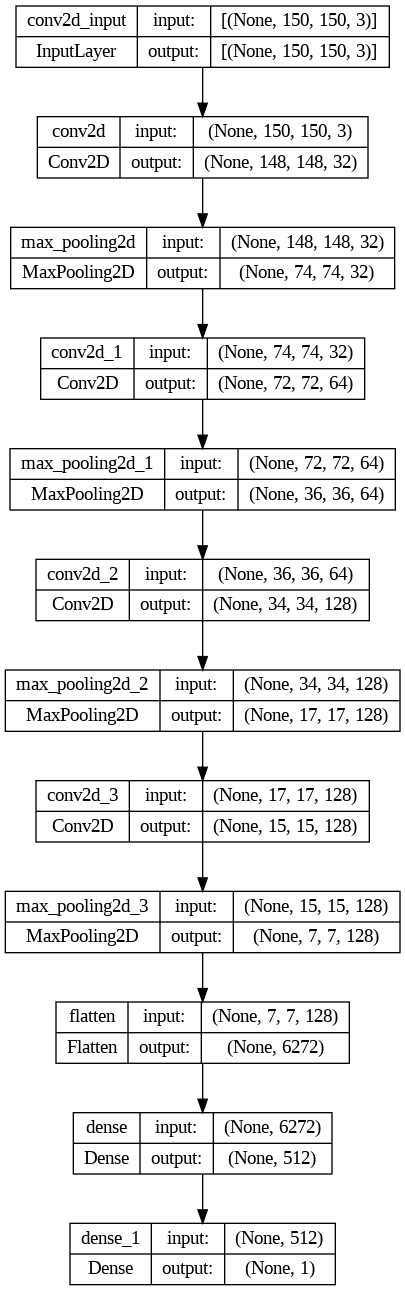

In [ ]:
# Visualize the architecture of the saved model
plot_model(loaded_model, to_file='model_architecture.png', show_shapes=True)

In [ ]:
test_loss, test_acc = loaded_model.evaluate(test_generator)
print('Test accuracy:', test_acc*100)

33/33 [==============================] - 161s 5s/step - loss: 0.0398 - accuracy: 0.9848
Test accuracy: 98.4761893749237


In [ ]:
# Path to the test folder containing the subdirectories
test_folder = '/content/drive/My Drive/demo_tb_dataset/Test'

# Get a list of all subdirectories (class folders) in the test folder
class_folders = os.listdir(test_folder)

# Counter variable for serial number
serial_number = 1

# Iterate over each class folder
for class_folder in class_folders:
    # Construct the full path to the class folder
    class_folder_path = os.path.join(test_folder, class_folder)

    # Get a list of all image file names in the class folder
    image_files = os.listdir(class_folder_path)

    # Iterate over each image file
    for image_file in image_files:
        # Construct the full path to the image
        img_path = os.path.join(class_folder_path, image_file)

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0  # Normalize pixel values

        # Make predictions
        predictions = loaded_model.predict(img_array)

        # Interpret predictions
        if predictions[0][0] < 0.5:
            print("Test Image Number:", serial_number, "- X-Ray:", image_file, "- Normal")
        else:
            print("Test Image Number:", serial_number, "- X-Ray:", image_file, "- Tuberculosis Positive")

        # Increment serial number
        serial_number += 1


1/1 [==============================] - 1s 507ms/step
Test Image Number: 1 - X-Ray: Normal (1002).jpg - Normal
1/1 [==============================] - 0s 55ms/step
Test Image Number: 2 - X-Ray: Normal (1006).jpg - Normal
1/1 [==============================] - 0s 54ms/step
Test Image Number: 3 - X-Ray: Normal (1000).jpg - Normal
1/1 [==============================] - 0s 54ms/step
Test Image Number: 4 - X-Ray: Normal (1004).jpg - Normal
1/1 [==============================] - 0s 56ms/step
Test Image Number: 5 - X-Ray: Normal (1007).jpg - Normal
1/1 [==============================] - 0s 132ms/step
Test Image Number: 6 - X-Ray: Normal (1001).jpg - Normal
1/1 [==============================] - 0s 45ms/step
Test Image Number: 7 - X-Ray: Normal (1005).jpg - Normal
1/1 [==============================] - 0s 34ms/step
Test Image Number: 8 - X-Ray: Normal (1003).jpg - Normal
1/1 [==============================] - 0s 42ms/step
Test Image Number: 9 - X-Ray: Normal (1030).jpg - Normal
1/1 [============

# **Confusion matrix and Classification report**

In [ ]:
# List to store true labels and predicted probabilities
true_labels = []
predicted_probabilities = []

# Iterate through the test generator to collect true labels and predicted probabilities
for i in range(len(test_generator)):
    batch = test_generator[i]
    true_labels.extend(batch[1])
    predictions = loaded_model.predict(batch[0])
    predicted_probabilities.extend(predictions.flatten())  # Flatten predictions to match true labels

# Convert true labels and predicted probabilities to numpy arrays
true_labels = np.array(true_labels)
predicted_probabilities = np.array(predicted_probabilities)

# Convert probabilities to class predictions
predicted_classes = (predicted_probabilities > 0.5).astype(int)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Compute classification report
class_report = classification_report(true_labels, predicted_classes)
print("\nClassification Report:")
print(class_report)

1/1 [==============================] - 0s 351ms/step
Confusion Matrix:
[[517   8]
 [  8 517]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       525
         1.0       0.98      0.98      0.98       525

    accuracy                           0.98      1050
   macro avg       0.98      0.98      0.98      1050
weighted avg       0.98      0.98      0.98      1050



## **Visualize Confusion Matrix**

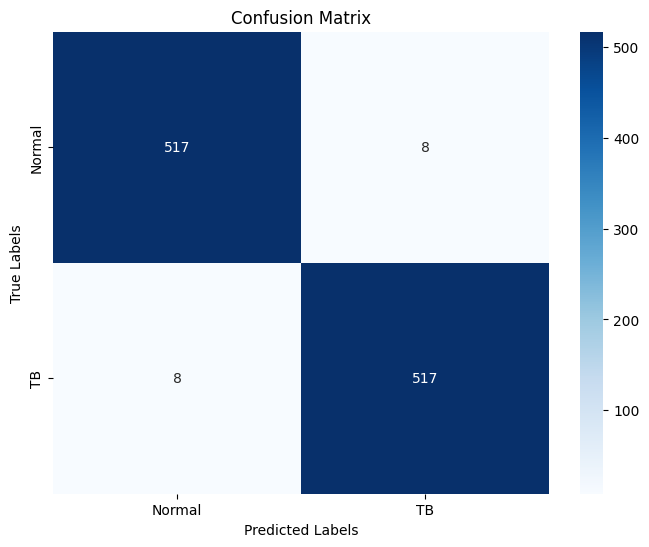

In [ ]:
# Visualize Confusion Matrix

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Normal', 'TB'], yticklabels=['Normal', 'TB'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## **Visualize Classification Report**

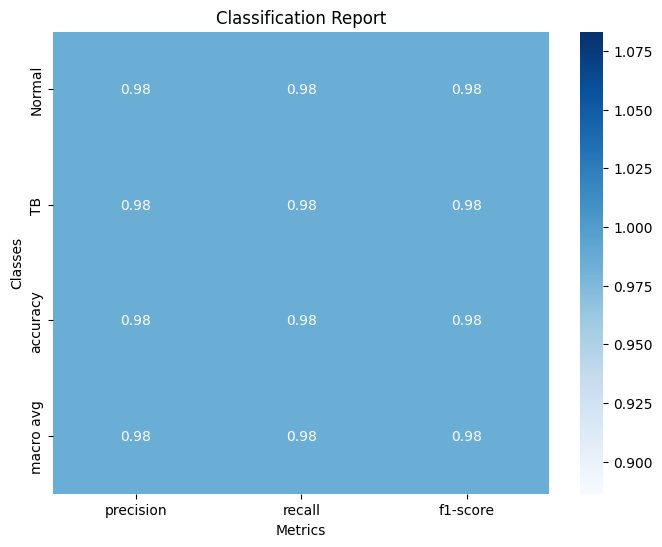

In [ ]:
# Visualize Classification Report

# Generate classification report
class_report = classification_report(true_labels, predicted_classes, target_names=['Normal', 'TB'], output_dict=True)

# Convert classification report to DataFrame for visualization
class_report_df = pd.DataFrame(class_report).transpose()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(class_report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

## **Visualize 10 Random sample predictions**

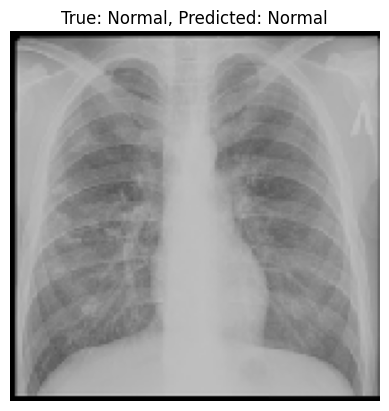

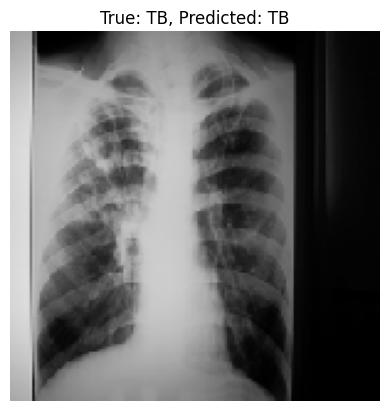

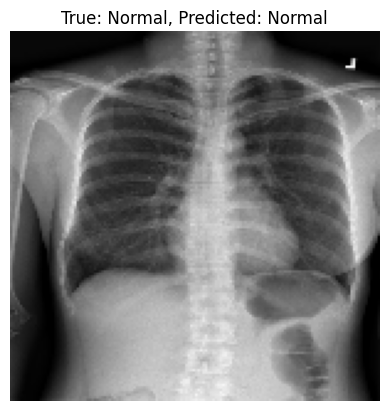

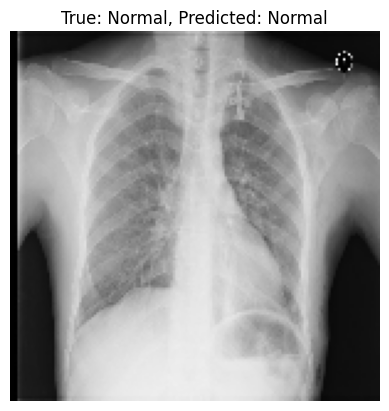

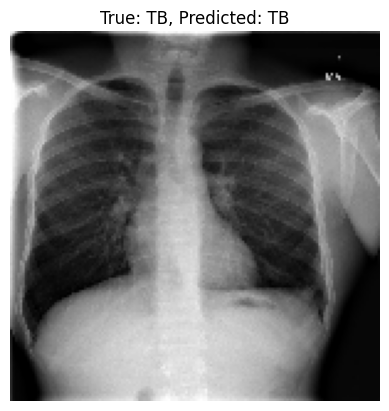

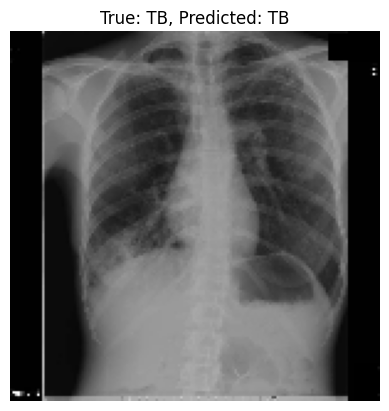

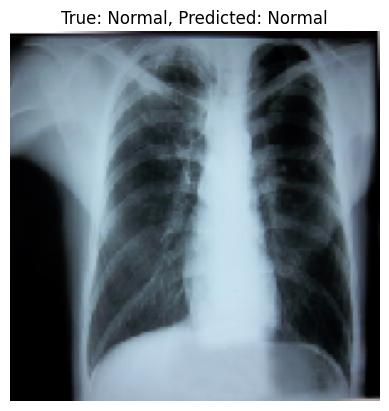

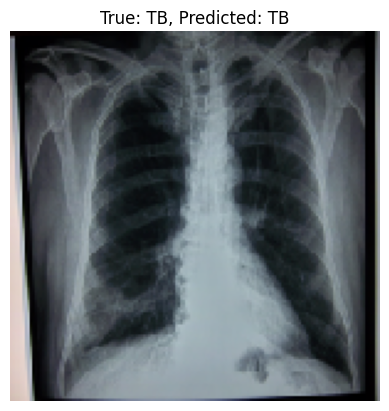

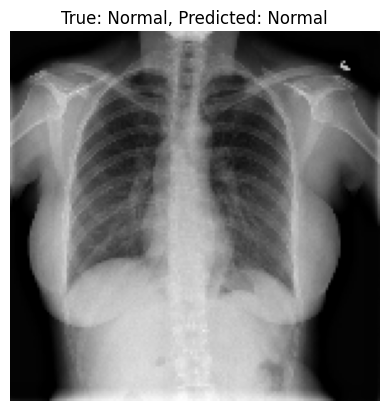

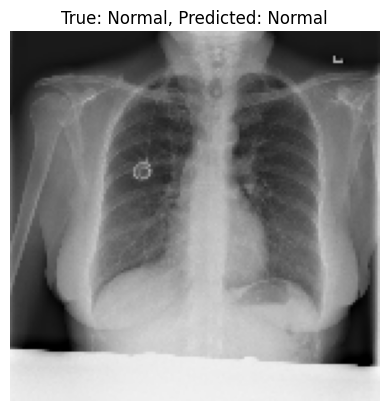

In [ ]:
# Visualize 10 Random sample predictions

# Get a list of indices to sample from
indices = random.sample(range(len(test_generator.filepaths)), 10)

# Visualize sample predictions for the selected indices
for index in indices:
    img_path = test_generator.filepaths[index]
    true_label = true_labels[index]
    pred_label = predicted_classes[index]

    img = image.load_img(img_path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    true_class = 'TB' if true_label == 1 else 'Normal'
    pred_class = 'TB' if pred_label == 1 else 'Normal'
    plt.title(f'True: {true_class}, Predicted: {pred_class}')
    plt.show()

# **ROC curve and AUC curve**

1/1 [==============================] - 0s 369ms/step


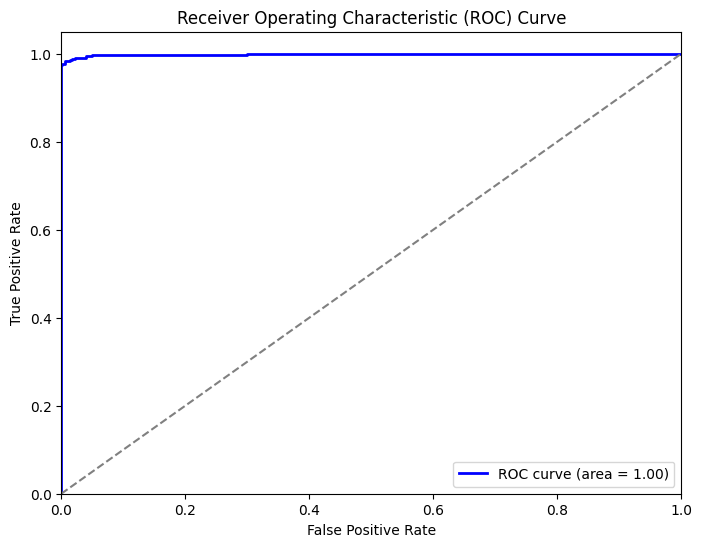

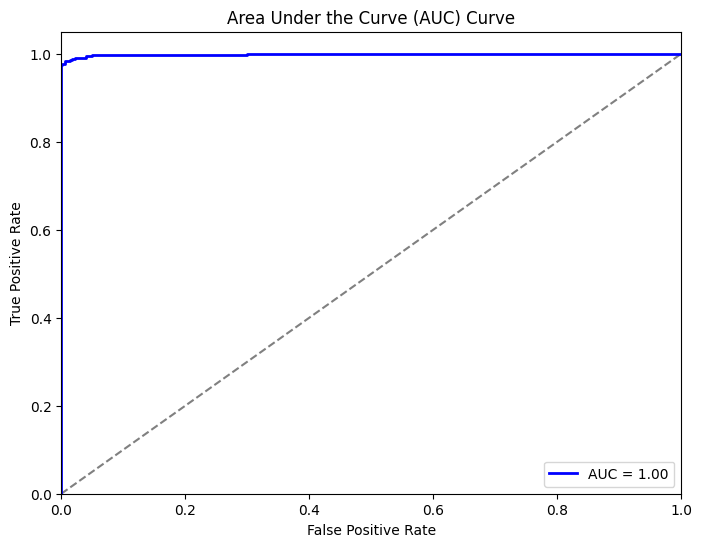

In [ ]:
# List to store true labels and predicted probabilities
true_labels = []
predicted_probabilities = []

# Iterate through the test generator to collect true labels and predicted probabilities
for i in range(len(test_generator)):
    batch = test_generator[i]
    true_labels.extend(batch[1])
    predicted_probabilities.extend(loaded_model.predict(batch[0]))

# Convert true labels and predicted probabilities to numpy arrays
true_labels = np.array(true_labels)
predicted_probabilities = np.array(predicted_probabilities)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot AUC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.plot(fpr, tpr, color='blue', lw=2, label='AUC = %0.2f' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under the Curve (AUC) Curve')
plt.legend(loc="lower right")
plt.show()